In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import time
import folium
import os
import sys
import abstract_flows.arrow as arrow
import abstract_flows.grid as grid
import abstract_flows.flows as flows
from load_data import load_data

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

Datos sintéticos

In [2]:
bf =[]

for i in range(1, 4):
    f = np.load(f'synthetic_data/f{i}.npy')
    bf.append(f)

In [3]:
for f in bf:
    print('Flow')
    print(f)

Flow
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
Flow
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]
Flow
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [4]:
laplacian = np.load('synthetic_data/laplacian.npy')
print('Laplacian')
print(laplacian)

Laplacian
[[ 1.         -0.5         0.         -0.40824829]
 [-0.5         1.          0.         -0.40824829]
 [ 0.          0.          1.         -0.57735027]
 [-0.40824829 -0.40824829 -0.57735027  1.        ]]


In [21]:
fs = np.load('synthetic_data/flows.npy')
print('Flows')
print(fs[0:2])
print('Cantidad de flujos', fs.shape[0])

Flows
[[[1.  0.  0.  0. ]
  [0.  1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]

 [[0.9 0.  0.  0. ]
  [0.1 1.  0.  0. ]
  [0.  0.  0.  1. ]
  [0.  0.  1.  0. ]]]
Cantidad de flujos 30


Resultados

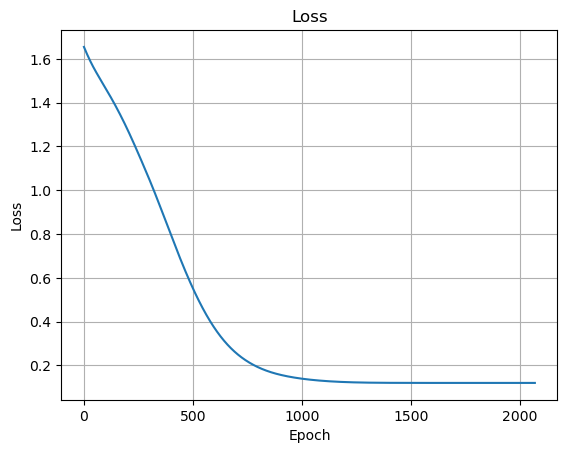

In [41]:
loss = np.load('results_little_experiment/loss.npy')
plt.plot(loss)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

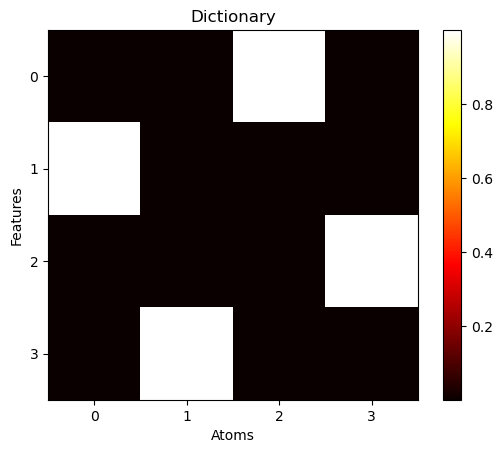

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


array([1., 1., 1., 1.], dtype=float32)

In [42]:
D = np.load('results_little_experiment/dictionary.npy')
plt.imshow(D, cmap='hot', interpolation='nearest')
plt.title('Dictionary')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D.shape[1], 1))
plt.yticks(np.arange(0, D.shape[0], 1))
plt.colorbar()
plt.show()
print(D)
D.sum(axis=0)

In [43]:
weights = np.load('results_little_experiment/weights.npy')
print(weights[1])
weights[1].sum(axis=1)

[[0.0998 0.9998 0.     0.0001]
 [0.0001 0.0001 0.9999 0.0001]
 [0.8998 0.0001 0.0001 0.0001]
 [0.0003 0.0001 0.     0.9997]]


array([1.0997, 1.0001, 0.9   , 1.0002], dtype=float32)

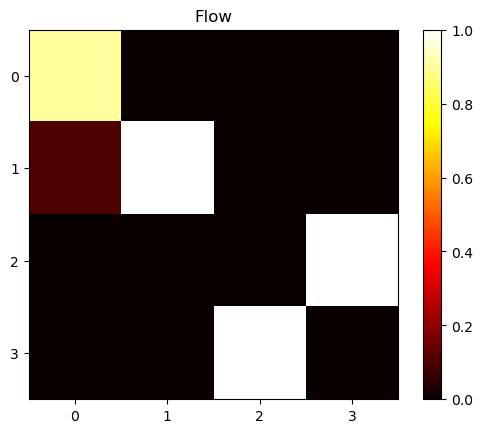

[[0.9 0.  0.  0. ]
 [0.1 1.  0.  0. ]
 [0.  0.  0.  1. ]
 [0.  0.  1.  0. ]]


In [44]:
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs[1])

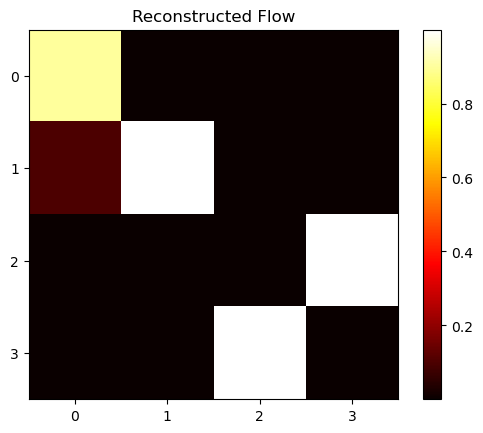

[[0.8998 0.0001 0.0001 0.0001]
 [0.0998 0.9998 0.     0.0001]
 [0.0003 0.0001 0.     0.9997]
 [0.0001 0.0001 0.9998 0.0001]]


In [45]:
fs_reconstructed = D@weights[1]
plt.imshow(fs_reconstructed, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow')
plt.xticks(np.arange(0, fs_reconstructed.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed)

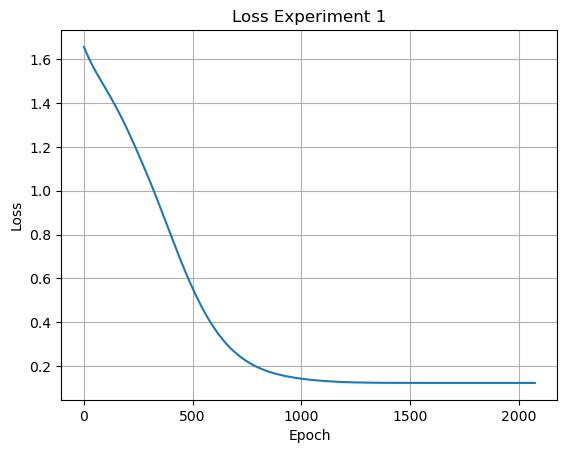

In [46]:
loss_1 = np.load('results_little_experiment_1/loss.npy')
plt.plot(loss_1)
plt.title('Loss Experiment 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

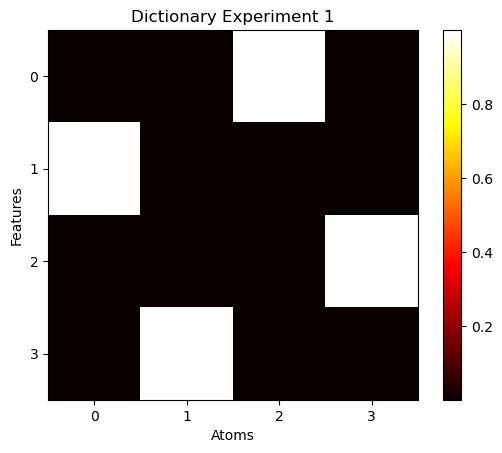

[[0.     0.     0.9995 0.0004]
 [0.9998 0.0001 0.0001 0.    ]
 [0.0002 0.     0.0002 0.9995]
 [0.     0.9999 0.0002 0.0001]]


array([1., 1., 1., 1.], dtype=float32)

In [47]:
D_1 = np.load('results_little_experiment_1/dictionary.npy')
plt.imshow(D_1, cmap='hot', interpolation='nearest')
plt.title('Dictionary Experiment 1')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D_1.shape[1], 1))
plt.yticks(np.arange(0, D_1.shape[0], 1))
plt.colorbar()
plt.show()
print(D_1)
D_1.sum(axis=0)

[[0.0996 0.9998 0.     0.0001]
 [0.0001 0.0001 0.9999 0.    ]
 [0.9001 0.0001 0.0001 0.0001]
 [0.0003 0.0001 0.     0.9998]]


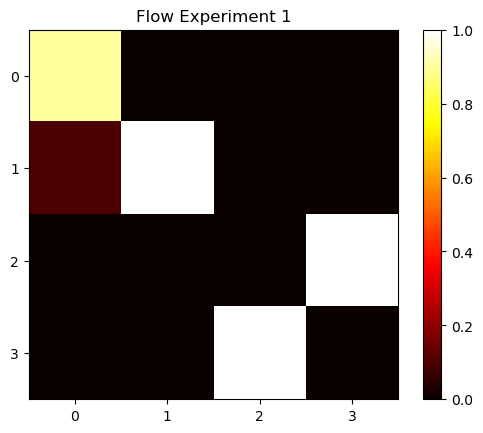

In [48]:
weights_1 = np.load('results_little_experiment_1/weights.npy')
print(weights_1[1])
weights_1[1].sum(axis=1)
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow Experiment 1')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()

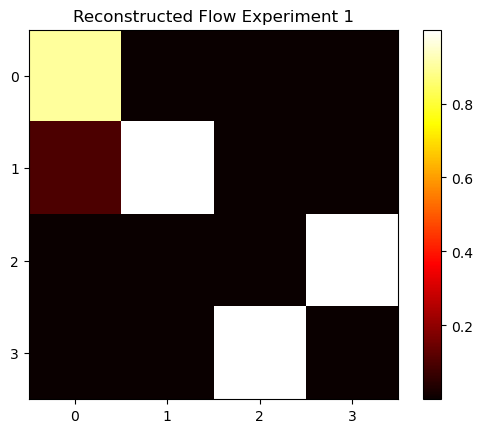

[[0.8996 0.0001 0.0001 0.0004]
 [0.0996 0.9996 0.0001 0.0001]
 [0.0004 0.0002 0.     0.9993]
 [0.0003 0.0001 0.9997 0.0001]]


In [49]:
fs_reconstructed_1 = D_1@weights_1[1]
plt.imshow(fs_reconstructed_1, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 1')
plt.xticks(np.arange(0, fs_reconstructed_1.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed_1.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed_1)

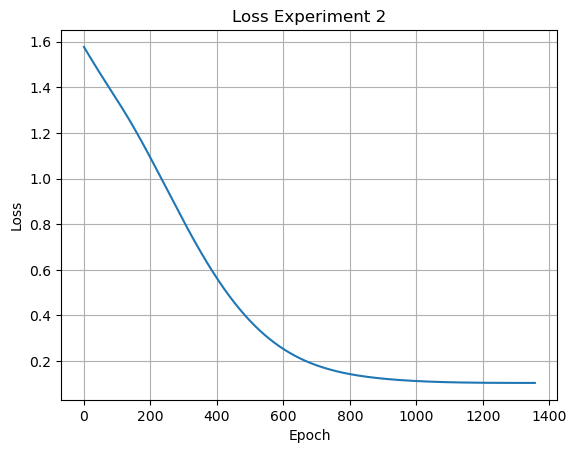

In [50]:
loss_2 = np.load('results_little_experiment_2/loss.npy')
plt.plot(loss_2)
plt.title('Loss Experiment 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

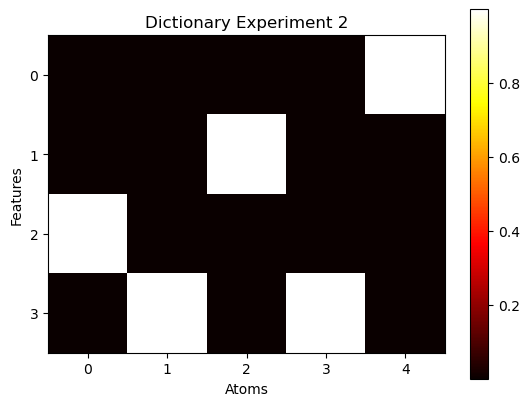

[[0.0001 0.0001 0.0001 0.0001 0.9991]
 [0.0001 0.0002 0.9995 0.0001 0.0003]
 [0.9997 0.0002 0.0002 0.0003 0.0004]
 [0.0001 0.9995 0.0002 0.9995 0.0002]]


In [51]:
D_2 = np.load('results_little_experiment_2/dictionary.npy')
plt.imshow(D_2, cmap='hot', interpolation='nearest')
plt.title('Dictionary Experiment 2')
plt.xlabel('Atoms')
plt.ylabel('Features')
plt.xticks(np.arange(0, D_2.shape[1], 1))
plt.yticks(np.arange(0, D_2.shape[0], 1))
plt.colorbar()
plt.show()
print(D_2)

[[0.0072 0.0002 0.0002 0.9928]
 [0.0029 0.0001 0.4995 0.0003]
 [0.0928 0.9919 0.0003 0.0003]
 [0.0031 0.0033 0.4986 0.0008]
 [0.8939 0.0045 0.0014 0.0058]]


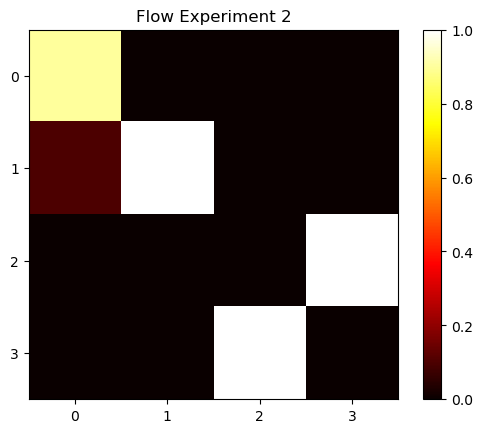

In [52]:
weights_2 = np.load('results_little_experiment_2/weights.npy')
print(weights_2[1])
weights_2[1].sum(axis=1)
plt.imshow(fs[1], cmap='hot', interpolation='nearest')
plt.title('Flow Experiment 2')
plt.xticks(np.arange(0, fs[1].shape[1], 1))
plt.yticks(np.arange(0, fs[1].shape[0], 1))
plt.colorbar()
plt.show()

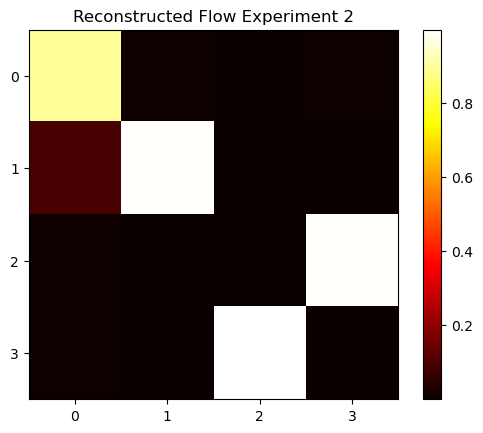

[[0.8931 0.0046 0.0016 0.0059]
 [0.093  0.9914 0.0004 0.0004]
 [0.0076 0.0004 0.0004 0.9925]
 [0.0062 0.0036 0.9976 0.0012]]


In [53]:
fs_reconstructed_2 = D_2@weights_2[1]
plt.imshow(fs_reconstructed_2, cmap='hot', interpolation='nearest')
plt.title('Reconstructed Flow Experiment 2')
plt.xticks(np.arange(0, fs_reconstructed_2.shape[1], 1))
plt.yticks(np.arange(0, fs_reconstructed_2.shape[0], 1))
plt.colorbar()
plt.show()
np.set_printoptions(precision=4, suppress=True)
print(fs_reconstructed_2)

Datos sintéticos (más pesados)

In [10]:
bf = []

for i in range(1, 5):
    f = np.load(f'synthetic_data2/f{i}.npy')
    bf.append(f)

In [12]:
for i in range(len(bf)):
    print(f'Flow {i+1}')
    print(bf[i])

Flow 1
[[0.  0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0.  1.  0.  0.1]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.2 0.2 0.  0.  0.2 0.  0.  0.2]
 [0.  0.2 0.5 0.5 0.  0.  0.5 0.  0.3 0.3]
 [0.  0.  0.2 0.2 0.3 0.  0.2 0.  0.1 0.2]
 [0.  0.1 0.1 0.1 0.1 1.  0.1 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.3 0.2]
 [0.  0.2 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.2 0. ]]
Flow 2
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.3 0.5 0.  0.  0.  0.3]
 [0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.1]
 [0.  0.  1.  1.  0.4 0.  0.  0.  1.  0.4]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.3 0.  0.  0.  0.  0.  0.3 0.3 0.  0. ]
 [0.1 0.  0.  0.  0.2 0.  0.1 0.1 0.  0.2]
 [0.5 0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.  0.  0.1 0.1 0.  0. ]]
Flow 3
[[0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.1 0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0